In [61]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.ticker import FormatStrFormatter
from mpl_lego import colorbar

%matplotlib inline

In [2]:
plt.rcParams.update({'text.usetex': True, 'font.family': 'serif'})

In [38]:
path = os.path.join(os.environ['HOME'], "fits/neurobiases/exp17/exp17_em_0_0_2_0.h5")

In [39]:
results = h5py.File(path, "r")

In [40]:
list(results)

['B_est',
 'B_est_coarse',
 'B_est_fine',
 'B_true',
 'Ks',
 'L_est',
 'L_est_coarse',
 'L_est_fine',
 'L_true',
 'Psi_est',
 'Psi_est_coarse',
 'Psi_est_fine',
 'Psi_true',
 'a_est',
 'a_est_coarse',
 'a_est_fine',
 'a_true',
 'aics_best',
 'aics_coarse',
 'aics_fine',
 'b_est',
 'b_est_coarse',
 'b_est_fine',
 'b_true',
 'bics_best',
 'bics_coarse',
 'bics_fine',
 'coupling_lambdas',
 'coupling_lambdas_fine',
 'scores_best',
 'scores_coarse',
 'scores_fine',
 'tuning_lambdas',
 'tuning_lambdas_fine']

In [132]:
coupling_lambdas_coarse

array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02])

In [134]:
np.logspace(np.log10(0.5 * coupling_lambdas_coarse[best_aic_coarse[0]]),
            np.log10((1/0.5) * coupling_lambdas_coarse[best_aic_coarse[0]]),
            20)

array([0.01034569, 0.01112876, 0.0119711 , 0.0128772 , 0.01385189,
       0.01490034, 0.01602816, 0.01724134, 0.01854635, 0.01995013,
       0.02146017, 0.0230845 , 0.02483178, 0.02671131, 0.02873311,
       0.03090794, 0.03324738, 0.03576389, 0.03847088, 0.04138276])

In [127]:
tuning_lambdas_coarse[best_aic_coarse[1]]

0.02069138081114789

In [124]:
results['b_est_fine'][best_mll_fine].squeeze()

array([[ 0.72965744,  0.34160836,  0.        ,  0.30086789,  0.        ,
         0.06954911,  0.        ,  0.57427963, -0.34118921,  0.        ],
       [ 0.02259294,  0.        , -1.03812425, -0.32639713, -0.27359983,
         0.11382689,  0.53381139,  0.26917813, -0.63366814,  0.        ],
       [ 0.        , -0.64686238, -1.0553173 , -0.89367417, -0.50128873,
        -0.37813392, -0.15413261,  0.16213793,  0.07587528,  0.00325409]])

In [88]:
results['b_est'][:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [56]:
a_est_coarse = np.squeeze(results["a_est_coarse"])
a_est_fine = np.squeeze(results["a_est_fine"])
a_est = np.squeeze(results["a_est"])
a_true = results["a_true"][:]

b_est_coarse = np.squeeze(results["b_est_coarse"])
b_est_fine = np.squeeze(results["b_est_fine"])
b_est = np.squeeze(results["b_est"])
b_true = results["b_true"][:]

aics_coarse = np.squeeze(results["aics_coarse"][:])
aics_fine = np.squeeze(results["aics_fine"][:])
aics_coarse_med = np.median(aics_coarse, axis=-1)
aics_fine_med = np.median(aics_fine, axis=-1)
best_aic_coarse = np.unravel_index(np.argmin(aics_coarse_med), aics_coarse_med.shape)
best_aic_fine = np.unravel_index(np.argmin(aics_fine_med), aics_fine_med.shape)

bics_coarse = np.squeeze(results["bics_coarse"][:])
bics_fine = np.squeeze(results["bics_fine"][:])
bics_coarse_med = np.median(bics_coarse, axis=-1)
bics_fine_med = np.median(bics_fine, axis=-1)
best_bic_coarse = np.unravel_index(np.argmin(bics_coarse_med), bics_coarse_med.shape)
best_bic_fine = np.unravel_index(np.argmin(bics_fine_med), bics_fine_med.shape)

mlls_coarse = np.squeeze(results["scores_coarse"][:])
mlls_fine = np.squeeze(results["scores_fine"][:])
mlls_coarse_med = np.median(mlls_coarse, axis=-1)
mlls_fine_med = np.median(mlls_fine, axis=-1)
best_mll_coarse = np.unravel_index(np.argmax(mlls_coarse_med), mlls_coarse_med.shape)
best_mll_fine = np.unravel_index(np.argmax(mlls_fine_med), mlls_fine_med.shape)

coupling_lambdas_coarse = results['coupling_lambdas'][:]
coupling_lambdas_fine = results['coupling_lambdas_fine'][:]
tuning_lambdas_coarse = results['tuning_lambdas'][:]
tuning_lambdas_fine = results['tuning_lambdas_fine'][:]

In [57]:
a_sr_coarse = np.median(np.count_nonzero(a_est_coarse, axis=-1) / a_true.size, axis=-1)
b_sr_coarse = np.median(np.count_nonzero(b_est_coarse, axis=-1) / b_true.size, axis=-1)
a_sr_fine = np.median(np.count_nonzero(a_est_fine, axis=-1) / a_true.size, axis=-1)
b_sr_fine = np.median(np.count_nonzero(b_est_fine, axis=-1) / b_true.size, axis=-1)

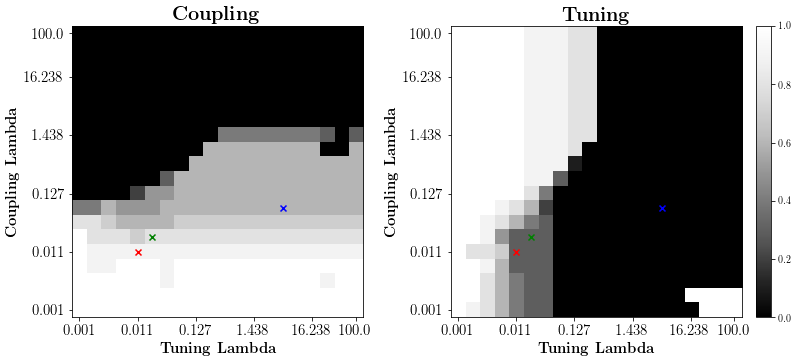

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.3)
img1 = axes[0].imshow(
    a_sr_coarse,
    origin='lower',
    vmin=0,
    vmax=1,
    cmap='Greys_r')
img2 = axes[1].imshow(
    b_sr_coarse,
    origin='lower',
    vmin=0,
    vmax=1,
    cmap='Greys_r')

for ax in axes:
    ax.scatter(best_mll_coarse[1], best_mll_coarse[0], color='red', marker='x')
    ax.scatter(best_aic_coarse[1], best_aic_coarse[0], color='green', marker='x')
    ax.scatter(best_bic_coarse[1], best_bic_coarse[0], color='blue', marker='x')
colorbar.append_colorbar_to_axis(axes[1], img2)

axes[0].set_title(r'\textbf{Coupling}', fontsize=20)
axes[1].set_title(r'\textbf{Tuning}', fontsize=20)
for ax in axes:
    ax.tick_params(labelsize=15)
    ax.set_xticks(np.append(np.arange(0, 20, 4), 19))
    ax.set_xticklabels(np.round(tuning_lambdas_coarse[ax.get_xticks()], decimals=3))
    ax.set_yticks(np.append(np.arange(0, 20, 4), 19))
    ax.set_yticklabels(np.round(coupling_lambdas_coarse[ax.get_yticks()], decimals=3))
    ax.set_xlabel(r'\textbf{Tuning Lambda}', fontsize=15)
    ax.set_ylabel(r'\textbf{Coupling Lambda}', fontsize=15)

plt.show()

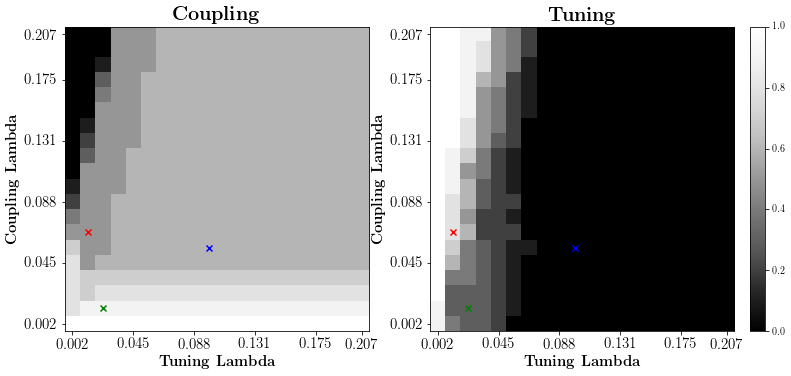

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img1 = axes[0].imshow(
    a_sr_fine,
    origin='lower',
    vmin=0,
    vmax=1,
    cmap='Greys_r')
img2 = axes[1].imshow(
    b_sr_fine,
    origin='lower',
    vmin=0,
    vmax=1,
    cmap='Greys_r')

axes[0].set_title(r'\textbf{Coupling}', fontsize=20)
axes[1].set_title(r'\textbf{Tuning}', fontsize=20)

for ax in axes:
    ax.scatter(best_mll_fine[1], best_mll_fine[0], color='red', marker='x')
    ax.scatter(best_aic_fine[1], best_aic_fine[0], color='green', marker='x')
    ax.scatter(best_bic_fine[1], best_bic_fine[0], color='blue', marker='x')

    ax.tick_params(labelsize=15)
    ax.set_xticks(np.append(np.arange(0, 20, 4), 19))
    ax.set_xticklabels(np.round(tuning_lambdas_fine[ax.get_xticks()], decimals=3))
    ax.set_yticks(np.append(np.arange(0, 20, 4), 19))
    ax.set_yticklabels(np.round(coupling_lambdas_fine[ax.get_yticks()], decimals=3))
    ax.set_xlabel(r'\textbf{Tuning Lambda}', fontsize=15)
    ax.set_ylabel(r'\textbf{Coupling Lambda}', fontsize=15)

colorbar.append_colorbar_to_axis(axes[1], img2)

plt.show()

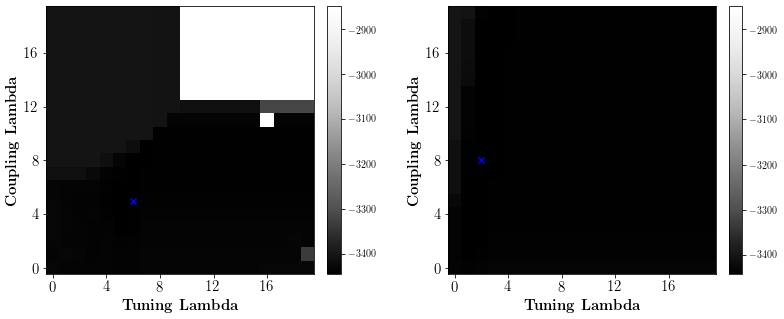

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.5)
img1 = axes[0].imshow(
    aics_coarse_med,
    origin='lower',
    vmax=-2849,
    cmap='Greys_r')
img2 = axes[1].imshow(
    aics_fine_med,
    origin='lower',
    vmax=-2849,
    cmap='Greys_r')

axes[0].scatter(best_aic_coarse[1], best_aic_coarse[0], color='blue', marker='x')
axes[1].scatter(best_aic_fine[1], best_aic_fine[0], color='blue', marker='x')
colorbar.append_colorbar_to_axis(axes[0], img1)
colorbar.append_colorbar_to_axis(axes[1], img2)

for ax in axes:
    ax.tick_params(labelsize=15)
    ax.set_xticks(np.arange(0, 20, 4))
    ax.set_yticks(np.arange(0, 20, 4))
    ax.set_xlabel(r'\textbf{Tuning Lambda}', fontsize=15)
    ax.set_ylabel(r'\textbf{Coupling Lambda}', fontsize=15)
plt.show()

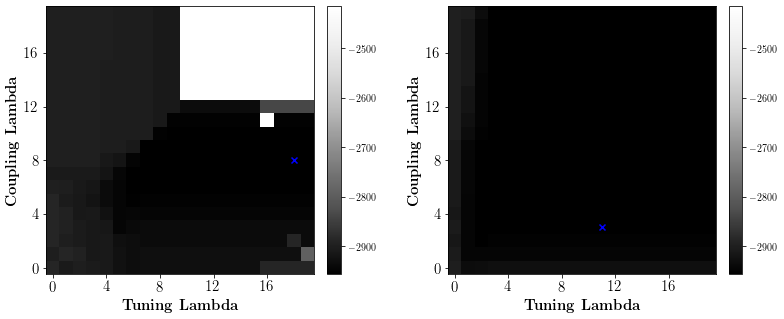

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.5)
img1 = axes[0].imshow(
    bics_coarse_med,
    origin='lower',
    vmax=-2415,
    cmap='Greys_r')
img2 = axes[1].imshow(
    bics_fine_med,
    origin='lower',
    vmax=-2415,
    cmap='Greys_r')

axes[0].scatter(best_bic_coarse[1], best_bic_coarse[0], color='blue', marker='x')
axes[1].scatter(best_bic_fine[1], best_bic_fine[0], color='blue', marker='x')
colorbar.append_colorbar_to_axis(axes[0], img1)
colorbar.append_colorbar_to_axis(axes[1], img2)

for ax in axes:
    ax.tick_params(labelsize=15)
    ax.set_xticks(np.arange(0, 20, 4))
    ax.set_yticks(np.arange(0, 20, 4))
    ax.set_xlabel(r'\textbf{Tuning Lambda}', fontsize=15)
    ax.set_ylabel(r'\textbf{Coupling Lambda}', fontsize=15)
plt.show()

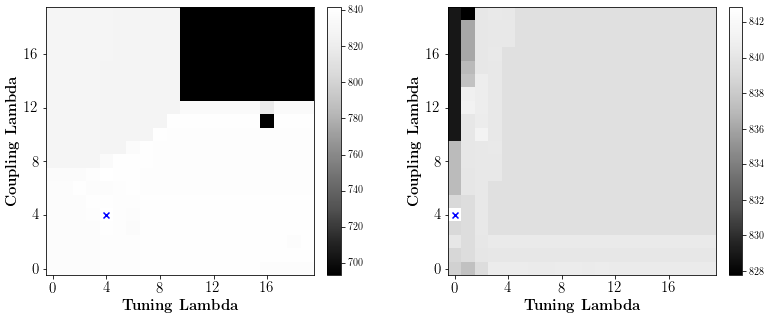

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.5)
img1 = axes[0].imshow(
    mlls_coarse_med,
    origin='lower',
    vmin=693,
    cmap='Greys_r')
img2 = axes[1].imshow(
    mlls_fine_med,
    origin='lower',
    cmap='Greys_r')

axes[0].scatter(best_mll_coarse[1], best_mll_coarse[0], color='blue', marker='x')
axes[1].scatter(best_mll_fine[1], best_mll_fine[0], color='blue', marker='x')
colorbar.append_colorbar_to_axis(axes[0], img1)
colorbar.append_colorbar_to_axis(axes[1], img2)

for ax in axes:
    ax.tick_params(labelsize=15)
    ax.set_xticks(np.arange(0, 20, 4))
    ax.set_yticks(np.arange(0, 20, 4))
    ax.set_xlabel(r'\textbf{Tuning Lambda}', fontsize=15)
    ax.set_ylabel(r'\textbf{Coupling Lambda}', fontsize=15)
plt.show()